# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Primeo se deben importar las librerías necesarias y mediante el transcurso del proyecto verificar si se deben agregar más librerías.
En segundo lugar, se verifica si hay que dar algún fomato especial para leer los archivos leyendo los archivos uno por uno con read_csv() y pasandolos por el método info().
Por último, según sea el caso se debe añadir parametros para arreglar posibles errores en la lectua de datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';') # Lee archivos de instacart_orders
products = pd.read_csv('/datasets/products.csv', sep=';')             # Lee archivos de products
order_products = pd.read_csv('/datasets/order_products.csv', sep=';') # Lee archivos de order_products
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')                 # Lee archivos de aisles
departments = pd.read_csv('/datasets/departments.csv', sep=';')            # Lee archivos de departments


In [3]:
# mostrar información del DataFrame
instacart_orders.info() # order_hour_of_day con faltan datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info() # product_name faltan datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Algunos dataframes tienen datos ausentes y algunos valores por corregir, mientras que en el dataframe (order_products) no nos muestra si posee datos faltantes o no por cada columna.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Primero hay que encontar las columnas que tengas los tipos de datos erróneos y arreglarsol según sea necesario.
Despues se debe buscar los valores ausentes que no permitan un correcto análisis de los datos y en caso de ser necesario, eliminar las filas, o caso contrario remplazar los valores para un análisis mas exacto.
También se debe buscar antes de todo si existen valores duplicados y eliminarlos para que no existan incoherencias dentro de los resultados del análisis.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Corregir los tipos de datos
instacart_orders['order_id'] = instacart_orders['order_id'].astype(int)
instacart_orders['user_id'] = instacart_orders['user_id'].astype(int)
instacart_orders['order_number'] = instacart_orders['order_number'].astype(int)
instacart_orders['order_dow'] = instacart_orders['order_dow'].astype(int)
instacart_orders['order_hour_of_day'] = instacart_orders['order_hour_of_day'].astype(int)
instacart_orders['days_since_prior_order'] = instacart_orders['days_since_prior_order'].astype(float)  # Puede tener NaNs


In [9]:
# Revisa si hay pedidos duplicados
instacart_orders[instacart_orders.duplicated()] # Busca los valores duplicados en los pedidos únicos


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Existen un total de 15 filas duplicadas en instacart_orders, y tienen en común que todos se realizaron el mismo día (miércoles) a las 2 de la mañana.

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

#'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).
#'order_hour_of_day': hora del día en que se hizo el pedido.

ped_mier_2am = (instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)
print(instacart_orders[ped_mier_2am])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Existen 121 pedidos realizados los miercoles a las 2 am, por lo que se puede decir que son datos válidos para el estudio.

In [11]:
# Elimina los pedidos duplicados
instacart_orders.drop_duplicates()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [12]:
# Vuelve a verificar si hay filas duplicadas
instacart_orders[instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
instacart_orders[instacart_orders['order_id'].duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Describe brevemente tus hallazgos y lo que hiciste con ellos

Existen 15 filas totalmente duplicadas, sin embargo, no se pueden eliminar mediante el comando drop_duplicates().

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
products[products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [15]:
# Revisa únicamente si hay ID de departamentos duplicados
products['department_id'].duplicated().sum()

49673

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
product_names = products['product_name'].str.upper()
product_names = product_names.duplicated()
print(product_names.sum())

1361


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
products[(~products['department_id'].isna())]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Existen algunos duplicados según cada columna, sin embargo, se los deja solo demostrados para poder corregirlos más adelante según sea necesario dentro del proyecto.

### `departments` data frame

In [18]:
# Corregir los tipos de datos
departments['department_id'] = departments['department_id'].astype(int)
departments['department'] = departments['department'].astype(str)

# Revisa si hay filas totalmente duplicadas
departments[departments.duplicated()]

,department_id,department


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
departments[departments['department_id'].duplicated()]

,department_id,department


No existen valores duplicados dentro de este dataframe.

### `aisles` data frame

In [20]:
# Corregir los tipos de datos
aisles['aisle_id'] = aisles['aisle_id'].astype(int)
aisles['aisle'] = aisles['aisle'].astype(str)

# Revisa si hay filas totalmente duplicadas
aisles[aisles.duplicated()]

,aisle_id,aisle


In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles[aisles['aisle_id'].duplicated()]

,aisle_id,aisle


No existen valores duplicados dentro de este dataframe.

### `order_products` data frame

In [22]:
# Corregir los tipos de datos
#order_products['order_id'] = order_products['order_id'].astype(int)
order_products['product_id'] = order_products['product_id'].astype(int)
#order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products['reordered'] = order_products['reordered'].astype(int)

# Revisa si hay filas totalmente duplicadas
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products['order_id'].duplicated().count()

4545007

No existen filas totalmente duplicadas dentro de este dataframe, sin embargo, si se encontro duplicados engañosos dentro de (order_id)

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
product_name_null = products[products['product_name'].isna()]
print(product_name_null)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Existen 1258 filas donde no se tiene un nombre de un producto.

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
product_name_unique = product_name_null['aisle_id'].unique()

if len(product_name_unique) == 100:
    print(f"Todos los valores ausentes en '{'product_name'}' se relacionan con el valor '{product_name_unique[0]}' en '{aisle_id}'.")
else:
    print(f"Los valores ausentes en '{'product_name'}' se relacionan con diferentes valores en '{'aisle_id'}': {product_name_unique}.")

Los valores ausentes en 'product_name' se relacionan con diferentes valores en 'aisle_id': [100].


Los valores ausentes en 'product_name' se relacionan con diferentes valores en 'aisle_id': [100].

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
product_name_unique = product_name_null['department_id'].unique()

if len(product_name_unique) == 21:
    print(f"Todos los valores ausentes en '{'product_name'}' se relacionan con el valor '{product_name_unique[0]}' en '{department_id}'.")
else:
    print(f"Los valores ausentes en '{'product_name'}' se relacionan con diferentes valores en '{'department_id'}': {product_name_unique}.")

Los valores ausentes en 'product_name' se relacionan con diferentes valores en 'department_id': [21].


Los valores ausentes en 'product_name' se relacionan con diferentes valores en 'department_id': [21].

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = aisles['aisle_id'] == 100
aisle_fil = aisles[aisle_100]

department_21 = departments['department_id'] == 21
department_fil = departments[department_21]

datos_aisle_department = pd.concat([aisle_fil,department_fil], axis = 'columns')
print(datos_aisle_department)

    aisle_id    aisle  department_id department
20       NaN      NaN           21.0    missing
99     100.0  missing            NaN        NaN


Los datos del pasillo con ID 100 y el departamento con ID 21 coinciden con tener valores ausentes.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna(value = 'Unknown',inplace = True)
print(products.sample(10))

       product_id                                       product_name  \
39542       39543                                   Water- Sparkling   
33105       33106                                  Organic Firm Tofu   
48303       48304                                 Tropical Trail Mix   
2025         2026                              Traditional Multipack   
40146       40147  Despicable Me Bello! Strawberry Banana/Bello! ...   
46045       46046  Pillsbury Funfetti Vibrant Green Vanilla Frosting   
46157       46158                     Disinfecting Wipes Lemon Scent   
45406       45407                                         Cooked Ham   
18025       18026                        English Tea Scones Original   
18630       18631  Baked with Whole Grain Xtra Cheddar Baked Snac...   

       aisle_id  department_id  
39542       115              7  
33105        14             20  
48303       125             19  
2025        125             19  
40146       120             16  
46045    

Se pudo reemplazar correctamente los valores NaN por Unknown, y mediante la ejecución de la implesión con sample se puede verificar.

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
instacart_orders['order_number'].isna().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores ausentes de pedidos y existen 15 valores duplicados.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
val_min = order_products['add_to_cart_order'].min()
val_max = order_products['add_to_cart_order'].max()

print('Valor mínimo:',val_min)
print('Valor máximo:',val_max)

Valor mínimo: 1.0
Valor máximo: 64.0


El valor mínimo es de 1.0 y el valor máximo es de 64.0 pedidos en un carrito.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
add_to_cart_order_val_nul = order_products[order_products['add_to_cart_order'].isna()]

print(add_to_cart_order_val_nul)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
add_to_cart_order_val_nul_64 = add_to_cart_order_val_nul[add_to_cart_order_val_nul['product_id'] >= 64]

print(add_to_cart_order_val_nul_64)



# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

add_to_cart_order_val_nul_64 = add_to_cart_order_val_nul.groupby('order_id')['product_id'].count()

print(add_to_cart_order_val_nul_64)

add_to_cart_order_val_nul_64_sort = add_to_cart_order_val_nul_64.sort_values(ascending = True)

print(add_to_cart_order_val_nul_64_sort)


# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(add_to_cart_order_val_nul_64, 'Valor mínimo',add_to_cart_order_val_nul_64.min())


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[832 rows x 4 columns]
order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64
order_id
9310        1
747668      1
1598369     1

Describe brevemente cuáles son tus hallazgos.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna('999', inplace = True)
order_products['add_to_cart_order'].astype('int')

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64

Ahora la columna add_to_cart_order puede mostrar datos reales, y en el caso donde fueron desconocidos simplemente muestra 999.

## Conclusiones

Se debe revisar todos los datos que puedan ser relevantes para el desarrollo del proyecto, y en base a eso, se debe verificar y se puede cambiar los tipos de datos según sea necesario para de esta manera, poder facilitar el análisis de los datos en cuestión.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(instacart_orders['order_hour_of_day'].describe())

print('\n')

print(instacart_orders['order_hour_of_day'].sort_values(ascending = True))

count    478967.000000
mean         13.446676
std           4.224986
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


185170     0
171230     0
12191      0
354365     0
354352     0
          ..
168867    23
420912    23
266130    23
143538    23
192245    23
Name: order_hour_of_day, Length: 478967, dtype: int64


In [37]:
instacart_orders['order_dow'].describe()

print('\n')

print(instacart_orders['order_dow'].sort_values(ascending = True))



142011    0
325859    0
203830    0
203825    0
64243     0
         ..
331977    6
331974    6
331966    6
61562     6
0         6
Name: order_dow, Length: 478967, dtype: int64


Los valores son sensibles y correctos para su respectivo manejo.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

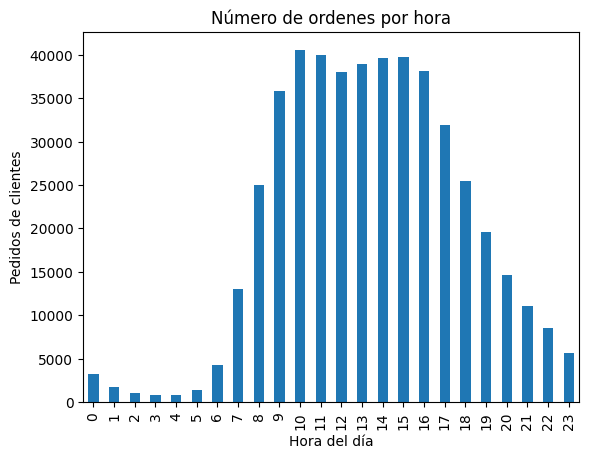

In [38]:
hour_of_day = instacart_orders.groupby('order_hour_of_day')['order_id'].count()

hour_of_day.plot(kind = 'bar',
                 title = 'Número de ordenes por hora',
                 xlabel = 'Hora del día', 
                 ylabel = 'Pedidos de clientes')

plt.show()

Se puede observar através del grafico de barras que el mayor flujo de pedidos se presenta entre las 9 y las 5 de la tarde.

### [A3] ¿Qué día de la semana compran víveres las personas?

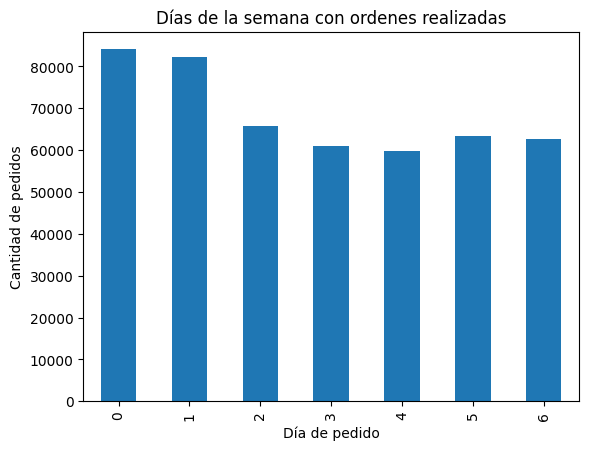

In [39]:
day_of_order = instacart_orders.groupby('order_dow')['order_id'].count()

day_of_order.plot(kind = 'bar',
                 title = 'Días de la semana con ordenes realizadas',
                 xlabel = 'Día de pedido', 
                 ylabel = 'Cantidad de pedidos')

plt.show()

Las personas compran la mayor cantidad de víveres en domingo.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

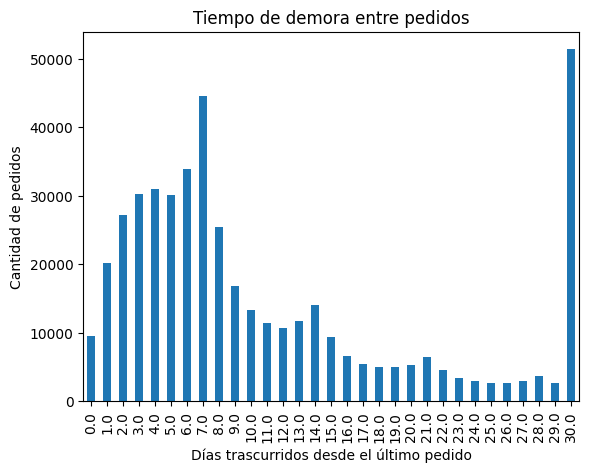

In [40]:
day_of_order = instacart_orders.groupby('days_since_prior_order')['order_id'].count()

day_of_order.plot(kind = 'bar',
                 title = 'Tiempo de demora entre pedidos',
                 xlabel = 'Días trascurridos desde el último pedido', 
                 ylabel = 'Cantidad de pedidos')

plt.show()


En el gráfico de barras se puede observar que las personas tienen un pico de reincidencia de pedidos entre el dia 7 y el dia 30 despues de su primer pedido.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

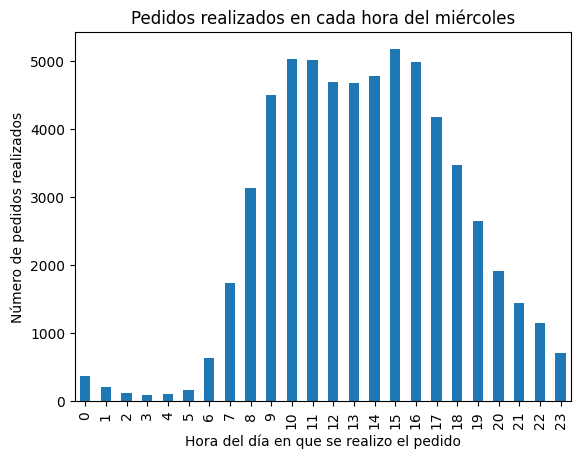

In [41]:
wed_orders = instacart_orders[instacart_orders['order_dow'] == 3].groupby('order_hour_of_day')['order_id'].count()

wed_orders.plot(kind = 'bar',
                title = 'Pedidos realizados en cada hora del miércoles',
                xlabel = 'Hora del día en que se realizo el pedido',
                ylabel = 'Número de pedidos realizados')

plt.show()

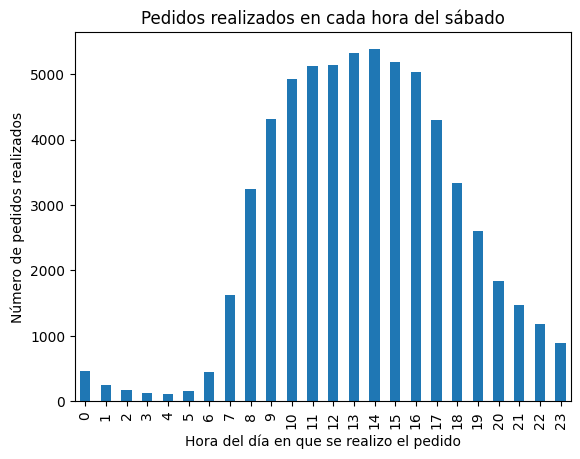

In [42]:
sat_orders = instacart_orders[instacart_orders['order_dow'] == 6].groupby('order_hour_of_day')['order_id'].count()

sat_orders.plot(kind = 'bar',
                title = 'Pedidos realizados en cada hora del sábado',
                xlabel = 'Hora del día en que se realizo el pedido',
                ylabel = 'Número de pedidos realizados')

plt.show()

In [43]:
both_orders = pd.concat([wed_orders,sat_orders], axis = 1)
both_orders.columns = ['wed_order_id','sat_order_id']

print(both_orders)

                   wed_order_id  sat_order_id
order_hour_of_day                            
0                           373           464
1                           215           254
2                           121           177
3                           101           125
4                           108           118
5                           170           161
6                           643           451
7                          1732          1619
8                          3125          3246
9                          4490          4311
10                         5026          4919
11                         5004          5116
12                         4688          5132
13                         4674          5323
14                         4774          5375
15                         5163          5188
16                         4976          5029
17                         4175          4295
18                         3463          3338
19                         2652   

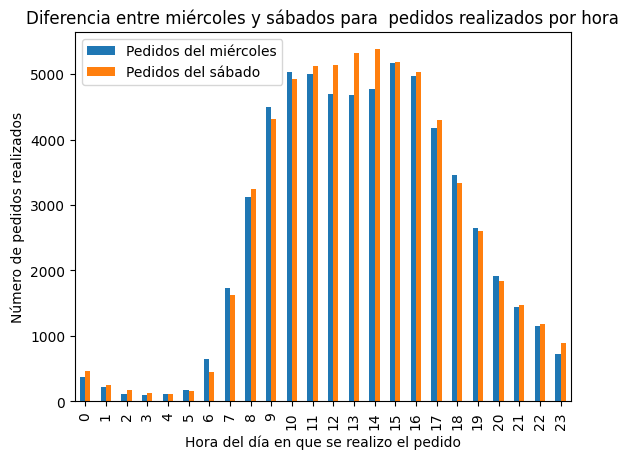

In [44]:
both_orders.plot(kind = 'bar',
                title = 'Diferencia entre miércoles y sábados para  pedidos realizados por hora',
                xlabel = 'Hora del día en que se realizo el pedido',
                ylabel = 'Número de pedidos realizados')

plt.legend(['Pedidos del miércoles','Pedidos del sábado'])
plt.show()

Las personas realizan la mayor cantidad de pedidos entre las 9 am y las 5 pm con mayor frecuencia en los sábados.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
# Agrupar por 'user_id' y contar el número de pedidos por cliente
dist_order = instacart_orders.groupby('order_number')['order_id'].count().reset_index()

# Renombrar la columna resultante para mayor claridad
dist_order.columns = ['user_id', 'num_pedidos']

print(dist_order)

    user_id  num_pedidos
0         1        28819
1         2        28633
2         3        28686
3         4        28704
4         5        25661
..      ...          ...
95       96          220
96       97          221
97       98          191
98       99          169
99      100          194

[100 rows x 2 columns]


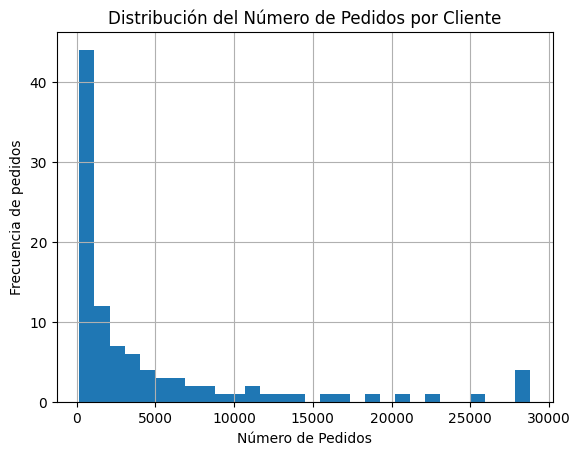

In [46]:
dist_order.hist(column = 'num_pedidos', bins = 30)

plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Frecuencia de pedidos')
plt.show()


La mayot cantidad de frecuencia de pedidos supone la mayot cantidad por los primeros 2500 pedidos realizados.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
# Cuenta el número de veces que un producto ha sido pedido
popular_product = order_products['product_id'].value_counts().reset_index()
popular_product.columns = ['product_id', 'num_pedidos']

print(popular_product)

       product_id  num_pedidos
0           24852        66050
1           13176        53297
2           21137        37039
3           21903        33971
4           47209        29773
...           ...          ...
45568       10543            1
45569        5222            1
45570        2347            1
45571       11893            1
45572       32074            1

[45573 rows x 2 columns]


In [48]:
# Combinamos el resultado con el dataframe 'products' para poder obtener el nombre de los productos.
popular_product = popular_product.merge(products, on='product_id', how='left')

print(popular_product)

       product_id  num_pedidos                           product_name  \
0           24852        66050                                 Banana   
1           13176        53297                 Bag of Organic Bananas   
2           21137        37039                   Organic Strawberries   
3           21903        33971                   Organic Baby Spinach   
4           47209        29773                   Organic Hass Avocado   
...           ...          ...                                    ...   
45568       10543            1         Blueberry Premium Fruit Spread   
45569        5222            1              Organic Beef & Burger Rub   
45570        2347            1  Premium Mo' Beta Fruit Smoothie Blend   
45571       11893            1                                Unknown   
45572       32074            1          Unscented Sensitive Body Wash   

       aisle_id  department_id  
0            24              4  
1            24              4  
2            24         

In [49]:
top_20_popular_products = popular_product.head(20)
top_20_popular_products = top_20_popular_products[['product_id', 'product_name']]

print('Los 20 productos mas populares son:')
print('\n')
print(top_20_popular_products)

Los 20 productos mas populares son:


    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


Se pueden ver cuales son los productos más populares, y partiendo de quí se puede presumir que son los que primero se comprarían.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
# Cuenta el número de artículos por pedido
art_per_order = order_products.groupby('order_id')['product_id'].count().reset_index() 

print(art_per_order)

        order_id  product_id
0              4          13
1              9          15
2             11           5
3             19           3
4             20           8
...          ...         ...
450041   3421034          17
450042   3421053           9
450043   3421071           5
450044   3421077           4
450045   3421079           1

[450046 rows x 2 columns]


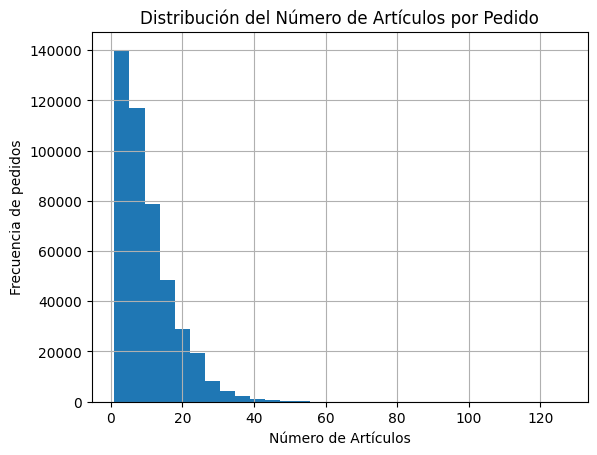

In [51]:
art_per_order.hist(column = 'product_id', bins = 30)
plt.title('Distribución del Número de Artículos por Pedido')
plt.xlabel('Número de Artículos')
plt.ylabel('Frecuencia de pedidos')
plt.show()

La mayoria de personas copran un máximo de 10 artículos o menos por pedido.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
"""order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
'order_id': número de ID que identifica de manera única cada pedido.
'product_id': número ID que identifica de manera única cada producto.
'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido."""

# Productos que han sido reordenados
reorder_products = order_products[order_products['reordered'] == 1]

# Contar el número de veces que cada producto ha sido reordenado
frec_reorder = reorder_products['product_id'].value_counts()

In [53]:
"""'product_id': número ID que identifica de manera única cada producto.
'product_name': nombre del producto.
'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
'department_id': número ID que identifica de manera única cada departamento de víveres."""


# Combinamos el resultado con el dataframe 'products' para poder obtener el nombre de los productos.
frec_reorder_products = reorder_products.merge(products, on='product_id', how='left')

print(frec_reorder_products)

         order_id  product_id add_to_cart_order  reordered  \
0          567889        1560               1.0          1   
1         2261212       26683               1.0          1   
2          491251        8670              35.0          1   
3         2571142        1940               5.0          1   
4         2456893       21616               4.0          1   
...           ...         ...               ...        ...   
2683833   1622300       24852               1.0          1   
2683834   1125324       40600               6.0          1   
2683835    577211       15290              12.0          1   
2683836    692640       47766               4.0          1   
2683837    319435         691               8.0          1   

                                              product_name  aisle_id  \
0                                               Bag Of Ice        37   
1        Cafe Latte Pure Lightly Sweetened Iced Coffee ...        91   
2                                      

In [54]:
# Contar el número de veces que cada producto ha sido reordenado
#frec_reorder_products = pd.DataFrame(frec_reorder_products) # Convertir series de nuevo a DataFrame

principal_reorder = frec_reorder_products.groupby('product_id')['product_name']

print(principal_reorder)


In [55]:
# Seleccionar los 20 productos más frecuentemente reordenados
top_20_reorder = principal_reorder.head(20)

print(top_20_reorder.head(20))



0                                            Bag Of Ice
1     Cafe Latte Pure Lightly Sweetened Iced Coffee ...
2                                        Diced Tomatoes
3                           Organic 2% Reduced Fat Milk
4                                  Organic Baby Arugula
5                                         Hass Avocados
6                       Natural Provolone Cheese Slices
7                      Whole Natural Value Pack Almonds
8                              Organic Cold Brew Coffee
9                      Organic Raw Multigreen Kobmbucha
10    Total 2% Greek Strained Yogurt with Cherry 5.3 oz
11                            Iced Coffee Lightly Sweet
12                              California Endive Farms
13                                        Tilapia Filet
14                          Organic Cheese Frozen Pizza
15                                 Organic Baby Arugula
16                        Organic Roasted Turkey Breast
17                               Trilogy Kombuch

Como se puede observar, se tienen productos variados y se puede entender que serían los productos con mayor ventas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
# Contar el número total de veces que cada producto se ha pedido
total_order_per_product = order_products['product_id'].value_counts().reset_index()
total_order_per_product.columns = ['product_id', 'total_pedidos']

print(total_order_per_product)

# Filtrar las filas donde reordered es 1
reorder_products = order_products[order_products['reordered'] == 1]

# Contar el número de veces que cada producto ha sido reordenado
total_reorder_per_product = reorder_products['product_id'].value_counts().reset_index()
total_reorder_per_product.columns = ['product_id', 'total_reordenes']

print(total_reorder_per_product)



       product_id  total_pedidos
0           24852          66050
1           13176          53297
2           21137          37039
3           21903          33971
4           47209          29773
...           ...            ...
45568       10543              1
45569        5222              1
45570        2347              1
45571       11893              1
45572       32074              1

[45573 rows x 2 columns]
       product_id  total_reordenes
0           24852            55763
1           13176            44450
2           21137            28639
3           21903            26233
4           47209            23629
...           ...              ...
36223        2591                1
36224       29201                1
36225       27154                1
36226       10789                1
36227        2049                1

[36228 rows x 2 columns]


In [57]:
# Combinar los DataFrames de pedidos totales y reordenes
propotion = total_order_per_product.merge(total_reorder_per_product, on='product_id', how='left')

print(propotion)

# Rellenar valores nulos en total_reordenes con 0
propotion['total_reordenes'].fillna(0, inplace=True)

# Calcular la proporción de reordenes
propotion['proporcion_reordenes'] = propotion['total_reordenes'] / propotion['total_pedidos']

print(propotion)

       product_id  total_pedidos  total_reordenes
0           24852          66050          55763.0
1           13176          53297          44450.0
2           21137          37039          28639.0
3           21903          33971          26233.0
4           47209          29773          23629.0
...           ...            ...              ...
45568       10543              1              NaN
45569        5222              1              NaN
45570        2347              1              NaN
45571       11893              1              NaN
45572       32074              1              NaN

[45573 rows x 3 columns]
       product_id  total_pedidos  total_reordenes  proporcion_reordenes
0           24852          66050          55763.0              0.844254
1           13176          53297          44450.0              0.834006
2           21137          37039          28639.0              0.773212
3           21903          33971          26233.0              0.772217
4           47

In [58]:
# Unir con el DataFrame de productos para obtener los nombres de los productos
propotions = propotion.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(propotions.head(20))

    product_id  total_pedidos  total_reordenes  proporcion_reordenes  \
0        24852          66050          55763.0              0.844254   
1        13176          53297          44450.0              0.834006   
2        21137          37039          28639.0              0.773212   
3        21903          33971          26233.0              0.772217   
4        47209          29773          23629.0              0.793639   
5        47766          24689          18743.0              0.759164   
6        47626          21495          15044.0              0.699884   
7        16797          20018          13945.0              0.696623   
8        26209          19690          13327.0              0.676841   
9        27845          19600          16251.0              0.829133   
10       27966          19197          14748.0              0.768245   
11       22935          15898          11145.0              0.701032   
12       24964          15292          10411.0              0.68

Se puede verificar que las bananas son los productos que más se vuelven a pedir con un índice superior al 80%

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
# Unir el DataFrame orders con order_products para obtener user_id en order_products
orders_products_merged = pd.merge(order_products, instacart_orders[['order_id', 'user_id']], on='order_id', how='left')

# Contar el número total de productos pedidos por cada cliente
total_ped_per_user = orders_products_merged.groupby('user_id')['product_id'].count().reset_index()
total_ped_per_user.columns = ['user_id', 'total_pedidos']

print(total_ped_per_user)

# Contar el número total de productos reordenados por cada cliente
total_reorders_per_user = orders_products_merged[orders_products_merged['reordered'] == 1].groupby('user_id')['product_id'].count().reset_index()
total_reorders_per_user.columns = ['user_id', 'total_reordenes']

print(total_reorders_per_user)

        user_id  total_pedidos
0             2             26
1             4              2
2             5             12
3             6              4
4             7             14
...         ...            ...
149621   206203             27
149622   206206             21
149623   206207             46
149624   206208            125
149625   206209             25

[149626 rows x 2 columns]
        user_id  total_reordenes
0             2                1
1             5                8
2             7               13
3            11                3
4            12                3
...         ...              ...
132986   206203                6
132987   206206               15
132988   206207               41
132989   206208               87
132990   206209                8

[132991 rows x 2 columns]


In [60]:
# Combinar los DataFrames de pedidos totales y reordenes
propotion2 = total_ped_per_user.merge(total_reorders_per_user, on='user_id', how='left')

# Rellenar valores nulos en total_reordenes con 0
propotion2['total_reordenes'].fillna(0, inplace=True)

# Calcular la proporción de reordenes
propotion2['proporcion_reordenes'] = propotion2['total_reordenes'] / propotion2['total_pedidos']

# Mostrar los resultados
print(propotion2.head(20))
print('\n')
print('La estadistica en cuanto a la proporcion de reordenes es:')
print('\n')
print(propotion2['proporcion_reordenes'].describe())


    user_id  total_pedidos  total_reordenes  proporcion_reordenes
0         2             26              1.0              0.038462
1         4              2              0.0              0.000000
2         5             12              8.0              0.666667
3         6              4              0.0              0.000000
4         7             14             13.0              0.928571
5        11             15              3.0              0.200000
6        12             12              3.0              0.250000
7        13             23             13.0              0.565217
8        14             61             22.0              0.360656
9        15             13              7.0              0.538462
10       16             32             17.0              0.531250
11       17             53             38.0              0.716981
12       19             48             14.0              0.291667
13       20              4              0.0              0.000000
14       2

Existe una media de 49% de productos que son reordenados por los clientes, no obstante, tambien hay clientes que no vuelven a reordenar los mismos productos y otrso que reordenan toda la cantidad de los productos que compraron anteriormente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
# Filtrar las filas donde 'add_to_cart_order' es 1
first_articles = order_products[order_products['add_to_cart_order'] == 1]

# Contar la frecuencia de los productos añadidos primero al carrito
frec_first_articles = first_articles['product_id'].value_counts().reset_index()
frec_first_articles.columns = ['product_id', 'frecuencia']

print(frec_first_articles)

       product_id  frecuencia
0           24852       15562
1           13176       11026
2           27845        4363
3           21137        3946
4           47209        3390
...           ...         ...
26755       10628           1
26756        8581           1
26757       35216           1
26758       43412           1
26759        4094           1

[26760 rows x 2 columns]


In [62]:
# Unir con el DataFrame de productos para obtener los nombres de los productos
top_20_first_articles = frec_first_articles.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Seleccionar las columnas relevantes
top_20_first_articles = top_20_first_articles[['product_id', 'product_name', 'frecuencia']]

# Mostrar los resultados
print(top_20_first_articles.head(20))

    product_id                 product_name  frecuencia
0        24852                       Banana       15562
1        13176       Bag of Organic Bananas       11026
2        27845           Organic Whole Milk        4363
3        21137         Organic Strawberries        3946
4        47209         Organic Hass Avocado        3390
5        21903         Organic Baby Spinach        3336
6        47766              Organic Avocado        3044
7        19660                 Spring Water        2336
8        16797                 Strawberries        2308
9        27966          Organic Raspberries        2024
10       44632   Sparkling Water Grapefruit        1914
11       49235          Organic Half & Half        1797
12       47626                  Large Lemon        1737
13         196                         Soda        1733
14       38689     Organic Reduced Fat Milk        1397
15       26209                        Limes        1370
16       12341                Hass Avocados     

In [ ]:
Las bananas son los artículos que por casi cuatro veces mas las personas ponen en sus carritos con diferencia del tercer artículo en adelante.

Escribe aquí tus conclusiones

### Conclusion general del proyecto:

Por medio de la realización de este proyecto, se pudo verificar como son los distintos hábitos de compra de los clientes de la empresa de Instacart. Se pudo determinar diversos parámetros como los artículos que mas se venden, los que son reordenados con mas frecuencia, su distribución, entre otros, lo cual es útil para que la empresa pueda desarrollar un plan de ventas especiico con base en los productos que se venden mas.